In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [ ]:
data_fake = pd.read_csv('fake.csv')
data_true = pd.read_csv('true.csv')

In [ ]:
data_fake['class'] = 0
data_true['class'] = 1

In [ ]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [ ]:
data_fake_manual_testing = data_fake.tail(100)
for i in range (23480,23380, -1):
  data_fake.drop([i], axis = 0, inplace = True)

data_true_manual_testing = data_true.tail(100)
for i in range (21416, 21316, -1):
  data_true.drop([i], axis = 0, inplace = True)

In [ ]:
data_fake.shape, data_true.shape

((23381, 5), (21317, 5))

In [ ]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

<ipython-input-7-90008d39c97b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
<ipython-input-7-90008d39c97b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [ ]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23381,Hillary Clinton: “Victory Fund” Gets Massive C...,Wall Street on ParadeAt the Democratic debate ...,Middle-east,"April 8, 2016",0
23382,Windows 10 is Stealing Your Bandwidth (You Mig...,21st Century Wire says We ve heard a lot of no...,Middle-east,"April 7, 2016",0
23383,BOILER ROOM – EP #51 – Social Rejects & Politi...,Tune in to the Alternate Current Radio Network...,Middle-east,"April 6, 2016",0
23384,REVEALED: The CIA Ran LSD Sex Houses in San Fr...,Gary Kamiya SF ChronicleOn an elegant dead-end...,Middle-east,"April 6, 2016",0
23385,Utah Ranchers Vow to Stand Up to Government Ab...,"Sam Levin The GuardianOn 23 January, a group o...",Middle-east,"April 5, 2016",0
23386,FLASHBACK: Florida Couple Nearly ‘Forecloses’ ...,21st Century Wire says After the great crash o...,Middle-east,"April 5, 2016",0
23387,EXPOSED: How US-Backed War on Syria Helped ISI...,ABC News PhotoDaniel Lazare Consortium NewsWh...,Middle-east,"April 4, 2016",0
23388,IRAQ 1991: US Carpet Bombs ‘Highway of Death’,ROAR MagI want to give testimony on what are c...,Middle-east,"April 3, 2016",0
23389,"David Icke on The Hillary, Donald & Bernie Show",21st Century Wire says Author David Icke break...,Middle-east,"April 2, 2016",0
23390,"WHEN IN ROME: Erdogan Thugs Rough-up Press, Pr...","21st Century Wire says NATO s ugly stepchild, ...",Middle-east,"April 1, 2016",0


In [ ]:
data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

In [ ]:
data.isnull().sum()

,0
text,0
class,0


In [ ]:
data = data.sample(frac = 1)

In [ ]:
data.head(5)

,text,class
2175,(Reuters) - Four business leaders have resigne...,1
20787,Detroit teachers make viral video: Blame Repub...,0
13430,"Well, we all know liberal goofball Sarah Silve...",0
13388,Censorship is alive and well when it comes to ...,0
19833,Impartial is not a word most people who know...,0


In [ ]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [ ]:
data.columns

Index(['text', 'class'], dtype='object')

In [ ]:
def wordopt(text):
  text = text.lower ()
  text = re.sub('\[. *?\]','',text)
  text = re.sub("\\W"," ",text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?›+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
  text = re.sub( "\n",' ',text)
  text = re.sub('\w*\d\w*','',text)
  return text

In [ ]:
data['text'] = data['text'].apply(wordopt)

In [ ]:
x = data['text']
y = data['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer ()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rf = RF.predict(xv_test)

In [ ]:
RF.score(xv_test, y_test)

0.9904250559284117

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5981
           1       0.99      0.99      0.99      5194

    accuracy                           0.99     11175
   macro avg       0.99      0.99      0.99     11175
weighted avg       0.99      0.99      0.99     11175



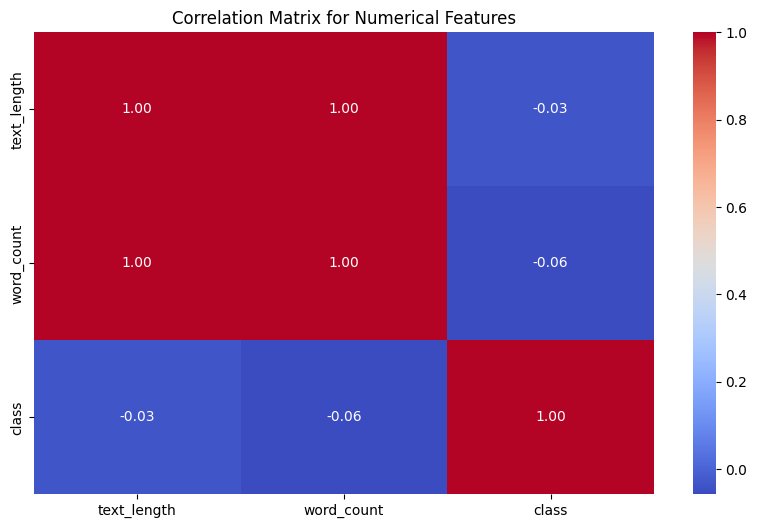

In [ ]:
# Example: Creating numerical features for correlation matrix
data['text_length'] = data['text'].apply(len)  # Length of the text
data['word_count'] = data['text'].apply(lambda x: len(x.split()))  # Word count

# Correlation matrix for numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = data[['text_length', 'word_count', 'class']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


<ipython-input-27-9e10428dfe94>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette='viridis')


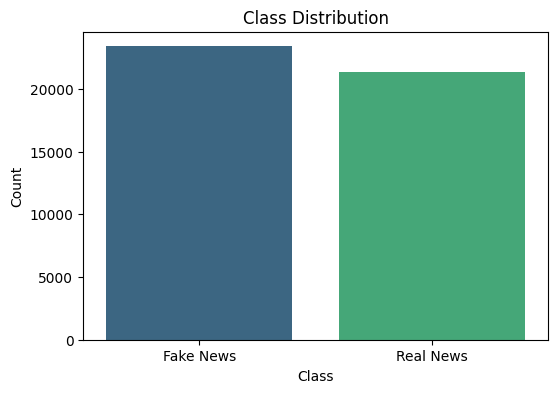

In [ ]:
# Class distribution visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake News', 'Real News'])
plt.show()


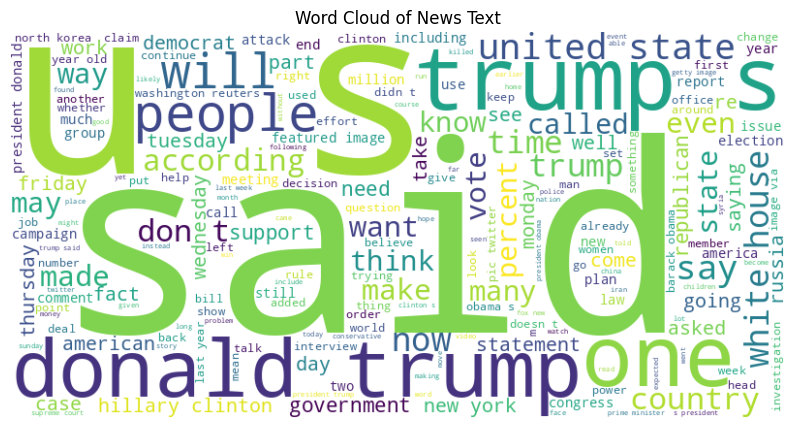

In [ ]:
from wordcloud import WordCloud

# Combine text data
all_text = ' '.join(data['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Text')
plt.show()


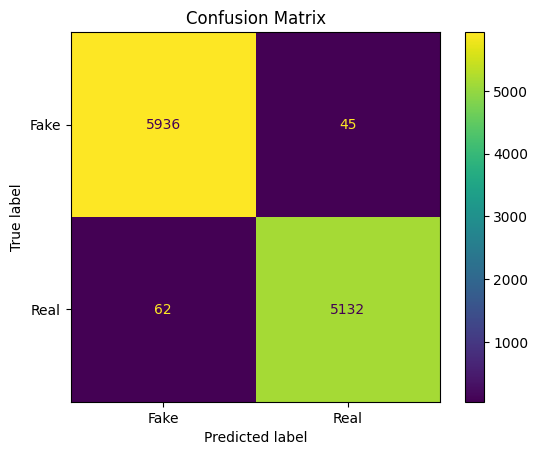

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example confusion matrix visualization
conf_matrix = confusion_matrix(y_test, pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Fake', 'Real'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
def output_label(n):
  if n == 0:
    return "Fake News"
  elif n == 1:
    return "Not A Fake News"


In [ ]:
def manual_testing (news):
  testing_news = {"text": [news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(wordopt)
  new_x_test = new_def_test[ "text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_RF = RF.predict(new_xv_test)
  return print("In RF Prediction: {}".format(output_label(pred_RF[0])))

In [1]:
news = str(input())

donald trump is USA president


The Pentagon is considering a Boeing proposal to supply Ukraine with cheap, small precision bombs fit ted on to abundantly available rockets, allowing Kyiv to strike far behind Russian lines, according t o a Reuters report. US and allied military inventories are shrinking, and Ukraine faces an increasin g need for more sophisticated weapons as the war drags on. Boeing's proposed system, dubbed Ground- La unched Small Diameter Bomb (GLSDB), is one of about a half-dozen plans for getting new munitions into
production for Ukraine and America's eastern European allies, industry sources told the news agency.
GLSDB could be delivered as early as spring 2023, according to a document reviewed by Reuters and thr ee people familiar with the plan. It combines the GBU-39 Small Diameter Bomb (SDB) with the M26 rocke t motor, both of which are common in US inventories. Although a handful of GLSDB units have already been made, there are many logistical obstacles to formal procurement. The Boeing plan requires a pric e discovery waiver, exempting the contractor from an in-depth review that ensures the Pentagon is get ting the best deal possible. Any arrangement would also require at least six suppliers to expedite sh ipments of their parts and services to produce the weapon quickly. Although the US has rebuffed requ ests for the 185-mile (297km) range Atacms missile, the GLSDB's 94-mile (150km) range would allow Ukr aine to hit valuable military targets that have been out of reach and help it continue pressing its c ounterattacks by disrupting Russian rear areas. GLSDB is made jointly by Saab AB and Boeing Co and h as been in development since 2019, well before the invasion, which Russia calls a "special operatio n". In October, SAAB chief executive Micael Johansson said of the GLSDB: "We are imminently shortly e xpecting contracts on that." According to the document - a Boeing proposal to US European - has smal 1, folding wings that allow it to glide more than 100km if dropped from an aircraft and targets as sm
all as 3ft in diameter.

In [ ]:
manual_testing(news)

In RF Prediction: Not A Fake News
